In [4]:
# Import of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
pollution_2020 = pd.read_csv('../data/raw/pollution data/2020.csv', sep = ';')
pollution_2020.head()

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,h02,v02,h03,v03,h04,v04,h05,v05,h06,v06,h07,v07,h08,v08,h09,v09,h10,v10,h11,v11,h12,v12,h13,v13,h14,v14,h15,v15,h16,v16,h17,v17,h18,v18,h19,v19,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
0,28,102,1,1,28102001_1_38,2020,1,1,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V
1,28,102,1,6,28102001_6_48,2020,1,1,"0,3",V,"0,3",V,"0,3",V,"0,3",V,"0,3",V,"0,3",V,"0,3",V,"0,3",V,"0,3",V,"0,3",V,"0,3",V,"0,4",V,"0,3",V,"0,3",V,"0,3",V,"0,3",V,"0,3",V,"0,4",V,"0,4",V,"0,4",V,"0,4",V,"0,4",V,"0,4",V,"0,4",V
2,28,102,1,7,28102001_7_8,2020,1,1,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"2,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V,"1,0",V
3,28,102,1,8,28102001_8_8,2020,1,1,"8,0",V,"8,0",V,"7,0",V,"6,0",V,"6,0",V,"6,0",V,"7,0",V,"6,0",V,"5,0",V,"5,0",V,"5,0",V,"5,0",V,"5,0",V,"5,0",V,"5,0",V,"5,0",V,"6,0",V,"7,0",V,"8,0",V,"8,0",V,"8,0",V,"9,0",V,"10,0",V,"8,0",V
4,28,102,1,10,28102001_10_49,2020,1,1,"8,0",V,"15,0",V,"13,0",V,"11,0",V,"12,0",V,"16,0",V,"17,0",V,"20,0",V,"11,0",V,"2,0",V,"1,0",V,"1,0",V,"9,0",V,"9,0",V,"8,0",V,"7,0",V,"14,0",V,"22,0",V,"22,0",V,"16,0",V,"16,0",V,"17,0",V,"17,0",V,"17,0",V


In [7]:
weather_2020 = pd.read_csv('../data/raw/weather data/2020.csv', sep = ';')
weather_2020.head()

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,h02,v02,h03,v03,h04,v04,h05,v05,h06,v06,h07,v07,h08,v08,h09,v09,h10,v10,h11,v11,h12,v12,h13,v13,h14,v14,h15,v15,h16,v16,h17,v17,h18,v18,h19,v19,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
0,28,102,1,81,28102001_81_89,2020,1,1,"1,1",V,1,V,"1,1",V,1,V,"1,2",V,"1,2",V,"1,5",V,"1,6",V,"1,6",V,1,V,"0,4",V,"0,8",V,"1,3",V,"1,6",V,"1,5",V,"0,8",V,"0,8",V,"1,3",V,"0,7",V,"0,2",V,"0,3",V,"0,9",V,"0,7",V,"0,4",V
1,28,102,1,82,28102001_82_89,2020,1,1,15,V,34,V,32,V,26,V,16,V,14,V,40,V,358,V,41,V,26,V,62,V,131,V,171,V,190,V,204,V,299,V,228,V,214,V,232,V,291,V,3,V,359,V,18,V,27,V
2,28,102,1,83,28102001_83_89,2020,1,1,"2,7",V,"2,6",V,"2,1",V,"1,9",V,"1,6",V,"1,6",V,0,V,"0,1",V,2,V,"5,2",V,"8,4",V,"9,8",V,"10,8",V,"12,8",V,"13,7",V,"13,9",V,"11,9",V,"8,6",V,"7,5",V,"7,3",V,"6,3",V,"5,3",V,"4,3",V,"4,2",V
3,28,102,1,86,28102001_86_89,2020,1,1,86,V,87,V,89,V,91,V,92,V,92,V,96,V,96,V,87,V,76,V,65,V,60,V,60,V,53,V,48,V,43,V,53,V,63,V,68,V,68,V,74,V,81,V,86,V,85,V
4,28,102,1,87,28102001_87_89,2020,1,1,946,V,946,V,945,V,945,V,944,V,945,V,946,V,947,V,947,V,948,V,948,V,947,V,945,V,944,V,943,V,943,V,944,V,944,V,944,V,944,V,945,V,945,V,945,V,944,V


In [8]:
# Eliminar las columnas que no son necesarias
pollution_2020.drop(["provincia", "punto_muestreo"], axis=1, inplace=True)
weather_2020.drop(["provincia", "punto_muestreo"], axis=1, inplace=True)

In [9]:

# Eliminar las columnas de validacion que contengan "v"
pollution_2020 = pollution_2020.drop(columns=[col for col in pollution_2020.columns if 'v' in col])
weather_2020 = weather_2020.drop(columns=[col for col in weather_2020.columns if 'v' in col])

In [10]:
pollution_2020 = pollution_2020.rename(columns={"magnitud": "contaminante"})
weather_2020 = weather_2020.rename(columns={"magnitud": "climatologia"})

In [11]:
# Crear una columna 'fecha' con el año, mes y día
pollution_2020['fecha'] = pd.to_datetime(pollution_2020[['ano', 'mes', 'dia']].astype(str).agg('-'.join, axis=1) + ' 00:00', errors='coerce', format='%Y-%m-%d %H:%M')
pollution_2020.drop(["ano", "mes", "dia"], axis=1, inplace=True)

weather_2020['fecha'] = pd.to_datetime(weather_2020[['ano', 'mes', 'dia']].astype(str).agg('-'.join, axis=1) + ' 00:00', errors='coerce', format='%Y-%m-%d %H:%M')
weather_2020.drop(["ano", "mes", "dia"], axis=1, inplace=True)

In [12]:
# Crear diccionario de los municipios de la Comunidad de Madrid
municipal_dictionary = {
    5: 'ALCALÁ DE HENARES',
    6: 'ALCOBENDAS',
    7: 'ALCORCÓN',
    9: 'ALGETE',
    13: 'ARANJUEZ',
    14: 'ARGANDA DEL REY',
    16: 'EL ATAZAR',
    45: 'COLMENAR VIEJO',
    47: 'COLLADO VILLALBA',
    49: 'COSLADA',
    58: 'FUENLABRADA',
    65: 'GETAFE',
    67: 'GUADALIX DE LA SIERRA',
    74: 'LEGANÉS',
    80: 'MAJADAHONDA',
    92: 'MÓSTOLES',
    102: 'ORUSCO DE TAJUÑA',
    120: 'PUERTO DE COTOS',
    123: 'RIVAS-VACIAMADRID',
    133: 'SAN MARTÍN DE VALDEIGLESIAS',
    148: 'TORREJÓN DE ARDOZ',
    161: 'VALDEMORO',
    171: 'VILLA DEL PRADO',
    180: 'VILLAREJO DE SALVANÉS'
}

In [13]:

# Crear diccionario de las magnitudes contaminantes
pollutant = {
    1: 'Dióxido de azufre (SO2)',
    6: 'Monóxido de carbono (CO)',
    7: 'Monóxido de nitrógeno (NO)',
    8: 'Dióxido de nitrógeno (NO2)',
    9: 'Partículas en suspensión < PM2,5 (PM2,5)',
    10: 'Partículas en suspensión < PM10 (PM10)',
    12: 'Óxidos de nitrógeno (NOx)',
    14: 'Ozono (O3)',
    20: 'Tolueno (CH3)',
    22: 'Black Carbon (BC)',
    30: 'Benceno (C6H6)',
    42: 'Hidrocarburos totales',
    44: 'Hidrocarburos no metánicos',
    431: 'MetaParaXileno'
}


pollution_2020['municipio'] = pollution_2020['municipio'].map(municipal_dictionary)
pollution_2020['contaminante'] = pollution_2020['contaminante'].map(pollutant)
pollution_2020.head()

,municipio,estacion,contaminante,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,fecha
0,ORUSCO DE TAJUÑA,1,Dióxido de azufre (SO2),"1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0",2020-01-01
1,ORUSCO DE TAJUÑA,1,Monóxido de carbono (CO),"0,3","0,3","0,3","0,3","0,3","0,3","0,3","0,3","0,3","0,3","0,3","0,4","0,3","0,3","0,3","0,3","0,3","0,4","0,4","0,4","0,4","0,4","0,4","0,4",2020-01-01
2,ORUSCO DE TAJUÑA,1,Monóxido de nitrógeno (NO),"1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","2,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0",2020-01-01
3,ORUSCO DE TAJUÑA,1,Dióxido de nitrógeno (NO2),"8,0","8,0","7,0","6,0","6,0","6,0","7,0","6,0","5,0","5,0","5,0","5,0","5,0","5,0","5,0","5,0","6,0","7,0","8,0","8,0","8,0","9,0","10,0","8,0",2020-01-01
4,ORUSCO DE TAJUÑA,1,Partículas en suspensión < PM10 (PM10),"8,0","15,0","13,0","11,0","12,0","16,0","17,0","20,0","11,0","2,0","1,0","1,0","9,0","9,0","8,0","7,0","14,0","22,0","22,0","16,0","16,0","17,0","17,0","17,0",2020-01-01


In [14]:
# Crear diccionario de las magnitudes meteorológicas
weather_magnitudes = {
    81: 'Velocidad del viento (m/s)',
    82: 'Dirección del viento (Grd)',
    83: 'Temperatura (ºC)',
    86: 'Humedad relativa (%)',
    87: 'Presión atmosférica (mbar)',
    88: 'Radiación solar (W/m²)',
    89: 'Precipitación (l/m²)',
}


weather_2020['municipio'] = weather_2020['municipio'].map(municipal_dictionary)
weather_2020['climatologia'] = weather_2020['climatologia'].map(weather_magnitudes)
weather_2020.head()

,municipio,estacion,climatologia,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,fecha
0,ORUSCO DE TAJUÑA,1,Velocidad del viento (m/s),"1,1",1,"1,1",1,"1,2","1,2","1,5","1,6","1,6",1,"0,4","0,8","1,3","1,6","1,5","0,8","0,8","1,3","0,7","0,2","0,3","0,9","0,7","0,4",2020-01-01
1,ORUSCO DE TAJUÑA,1,Dirección del viento (Grd),15,34,32,26,16,14,40,358,41,26,62,131,171,190,204,299,228,214,232,291,3,359,18,27,2020-01-01
2,ORUSCO DE TAJUÑA,1,Temperatura (ºC),"2,7","2,6","2,1","1,9","1,6","1,6",0,"0,1",2,"5,2","8,4","9,8","10,8","12,8","13,7","13,9","11,9","8,6","7,5","7,3","6,3","5,3","4,3","4,2",2020-01-01
3,ORUSCO DE TAJUÑA,1,Humedad relativa (%),86,87,89,91,92,92,96,96,87,76,65,60,60,53,48,43,53,63,68,68,74,81,86,85,2020-01-01
4,ORUSCO DE TAJUÑA,1,Presión atmosférica (mbar),946,946,945,945,944,945,946,947,947,948,948,947,945,944,943,943,944,944,944,944,945,945,945,944,2020-01-01


In [15]:
hour_pollution = [f'{col}_cont' if col.startswith("h") else col for col in pollution_2020.columns]
hour_weather = [f'{col}_clima' if col.startswith("h") else col for col in weather_2020.columns]

pollution_2020.columns = hour_pollution
weather_2020.columns = hour_weather


In [16]:
conn = sql.connect('../data/processed/air-q.db')
cursor = conn.cursor()

pollution_2020.to_sql("weather", conn, if_exists= "replace", index= False)
weather_2020.to_sql("pollution", conn, if_exists= "replace", index= False)

conn.close()


In [17]:
# import sqlite3
# import pandas as pd

# # Conectarse a la base de datos SQLite
# conn = sqlite3.connect('../data/processed/air-q.db')

# batch_size = 10000
# offset = 0

# # Inicializar un DataFrame vacío para almacenar los resultados
# air_quality = pd.DataFrame()

# while True:
#     query = f'''
#         SELECT *
#         FROM pollution
#         INNER JOIN weather
#         ON pollution.municipio = weather.municipio
#         AND pollution.estacion = weather.estacion
#         AND pollution.fecha = weather.fecha
#         LIMIT {batch_size} OFFSET {offset};
#     '''
    
#     # Ejecutar la consulta SQL y cargar el resultado en un DataFrame temporal
#     batch_data = pd.read_sql_query(query, conn)
    
#     # Verificar si hay resultados
#     if batch_data.empty:
#         break
    
#     # Concatenar el resultado del lote actual al DataFrame principal
#     air_quality = pd.concat([air_quality, batch_data], ignore_index=True)
    
#     # Incrementar el desplazamiento para el próximo lote
#     offset += batch_size

# # Cerrar la conexión a la base de datos
# conn.close()


In [18]:
import sqlite3
import pandas as pd

# Conectarse a la base de datos SQLite
conn = sqlite3.connect('../data/processed/air-q.db')

batch_size = 10000
offset = 0

# Inicializar un DataFrame vacío para almacenar los resultados
air_quality = pd.DataFrame()

while True:
    query = f'''
        SELECT *
        FROM weather
        INNER JOIN pollution
        ON weather.municipio = pollution.municipio
        AND weather.estacion = pollution.estacion
        AND weather.fecha = pollution.fecha
        LIMIT {batch_size} OFFSET {offset};
    '''
    
    # Ejecutar la consulta SQL y cargar el resultado en un DataFrame temporal
    batch_data = pd.read_sql_query(query, conn)
    
    # Verificar si hay resultados
    if batch_data.empty:
        break
    
    # Concatenar el resultado del lote actual al DataFrame principal
    air_quality = pd.concat([air_quality, batch_data], ignore_index=True)
    
    # Incrementar el desplazamiento para el próximo lote
    offset += batch_size

# Cerrar la conexión a la base de datos
conn.close()

In [19]:
# conn = sql.connect('../data/processed/air-q.db')

# batch_size = 10000
# offset = 0

# query = f'''
#     SELECT *
#     FROM pollution
#     INNER JOIN weather
#     ON pollution.municipio = weather.municipio
#     AND pollution.estacion = weather.estacion
#     AND pollution.fecha = weather.fecha
#     LIMIT {batch_size} OFFSET {offset};
# '''

# air_quality = pd.read_sql_query(query, conn)

# conn.close()



In [20]:
pd.set_option('display.max_columns', None)

In [21]:
air_quality.head()

,municipio,estacion,contaminante,h01_cont,h02_cont,h03_cont,h04_cont,h05_cont,h06_cont,h07_cont,h08_cont,h09_cont,h10_cont,h11_cont,h12_cont,h13_cont,h14_cont,h15_cont,h16_cont,h17_cont,h18_cont,h19_cont,h20_cont,h21_cont,h22_cont,h23_cont,h24_cont,fecha,municipio,estacion,climatologia,h01_clima,h02_clima,h03_clima,h04_clima,h05_clima,h06_clima,h07_clima,h08_clima,h09_clima,h10_clima,h11_clima,h12_clima,h13_clima,h14_clima,h15_clima,h16_clima,h17_clima,h18_clima,h19_clima,h20_clima,h21_clima,h22_clima,h23_clima,h24_clima,fecha
0,ORUSCO DE TAJUÑA,1,Dióxido de azufre (SO2),"1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0",2020-01-01 00:00:00,ORUSCO DE TAJUÑA,1,Dirección del viento (Grd),15,34,32,26,16,14,40,358,41,26,62,131,171,190,204,299,228,214,232,291,3,359,18,27,2020-01-01 00:00:00
1,ORUSCO DE TAJUÑA,1,Dióxido de azufre (SO2),"1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0",2020-01-01 00:00:00,ORUSCO DE TAJUÑA,1,Humedad relativa (%),86,87,89,91,92,92,96,96,87,76,65,60,60,53,48,43,53,63,68,68,74,81,86,85,2020-01-01 00:00:00
2,ORUSCO DE TAJUÑA,1,Dióxido de azufre (SO2),"1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0",2020-01-01 00:00:00,ORUSCO DE TAJUÑA,1,Precipitación (l/m²),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-01-01 00:00:00
3,ORUSCO DE TAJUÑA,1,Dióxido de azufre (SO2),"1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0",2020-01-01 00:00:00,ORUSCO DE TAJUÑA,1,Presión atmosférica (mbar),946,946,945,945,944,945,946,947,947,948,948,947,945,944,943,943,944,944,944,944,945,945,945,944,2020-01-01 00:00:00
4,ORUSCO DE TAJUÑA,1,Dióxido de azufre (SO2),"1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0",2020-01-01 00:00:00,ORUSCO DE TAJUÑA,1,Radiación solar (W/m²),12,12,12,12,12,12,12,22,165,340,381,600,500,572,464,260,103,14,13,13,13,13,13,13,2020-01-01 00:00:00


In [22]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409808 entries, 0 to 409807
Data columns (total 56 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   municipio     409808 non-null  object
 1   estacion      409808 non-null  int64 
 2   contaminante  409808 non-null  object
 3   h01_cont      407617 non-null  object
 4   h02_cont      407603 non-null  object
 5   h03_cont      407386 non-null  object
 6   h04_cont      407344 non-null  object
 7   h05_cont      407288 non-null  object
 8   h06_cont      400953 non-null  object
 9   h07_cont      396648 non-null  object
 10  h08_cont      393596 non-null  object
 11  h09_cont      391846 non-null  object
 12  h10_cont      390544 non-null  object
 13  h11_cont      391496 non-null  object
 14  h12_cont      394289 non-null  object
 15  h13_cont      399091 non-null  object
 16  h14_cont      402941 non-null  object
 17  h15_cont      405181 non-null  object
 18  h16_cont      406672 non

In [23]:
air_quality.shape

(409808, 56)

In [24]:
# Crear diccionario de los municipios de la Comunidad de Madrid
municipal_dictionary = {
    5: 'ALCALÁ DE HENARES',
    6: 'ALCOBENDAS',
    7: 'ALCORCÓN',
    9: 'ALGETE',
    13: 'ARANJUEZ',
    14: 'ARGANDA DEL REY',
    16: 'EL ATAZAR',
    45: 'COLMENAR VIEJO',
    47: 'COLLADO VILLALBA',
    49: 'COSLADA',
    58: 'FUENLABRADA',
    65: 'GETAFE',
    67: 'GUADALIX DE LA SIERRA',
    74: 'LEGANÉS',
    80: 'MAJADAHONDA',
    92: 'MÓSTOLES',
    102: 'ORUSCO DE TAJUÑA',
    120: 'PUERTO DE COTOS',
    123: 'RIVAS-VACIAMADRID',
    133: 'SAN MARTÍN DE VALDEIGLESIAS',
    148: 'TORREJÓN DE ARDOZ',
    161: 'VALDEMORO',
    171: 'VILLA DEL PRADO',
    180: 'VILLAREJO DE SALVANÉS'
}

# Crear diccionario de las magnitudes contaminantes
pollutant = {
    1: 'Dióxido de azufre (SO2)',
    6: 'Monóxido de carbono (CO)',
    7: 'Monóxido de nitrógeno (NO)',
    8: 'Dióxido de nitrógeno (NO2)',
    9: 'Partículas en suspensión < PM2,5 (PM2,5)',
    10: 'Partículas en suspensión < PM10 (PM10)',
    12: 'Óxidos de nitrógeno (NOx)',
    14: 'Ozono (O3)',
    20: 'Tolueno (CH3)',
    22: 'Black Carbon (BC)',
    30: 'Benceno (C6H6)',
    42: 'Hidrocarburos totales',
    44: 'Hidrocarburos no metánicos',
    431: 'MetaParaXileno'
}

# Crear diccionario de las magnitudes meteorológicas
weather_magnitudes = {
    81: 'Velocidad del viento (m/s)',
    82: 'Dirección del viento (Grd)',
    83: 'Temperatura (ºC)',
    86: 'Humedad relativa (%)',
    87: 'Presión atmosférica (mbar)',
    88: 'Radiación solar (W/m²)',
    89: 'Precipitación (l/m²)',
}

In [25]:
air_quality.isnull().sum()

municipio           0
estacion            0
contaminante        0
h01_cont         2191
h02_cont         2205
h03_cont         2422
h04_cont         2464
h05_cont         2520
h06_cont         8855
h07_cont        13160
h08_cont        16212
h09_cont        17962
h10_cont        19264
h11_cont        18312
h12_cont        15519
h13_cont        10717
h14_cont         6867
h15_cont         4627
h16_cont         3136
h17_cont         2289
h18_cont         2023
h19_cont         1953
h20_cont         1862
h21_cont         1953
h22_cont         2135
h23_cont         2184
h24_cont         2373
fecha               0
municipio           0
estacion            0
climatologia        0
h01_clima        2011
h02_clima        2132
h03_clima        2214
h04_clima        2519
h05_clima        2469
h06_clima        3271
h07_clima        3683
h08_clima        4238
h09_clima        4206
h10_clima        3973
h11_clima        3974
h12_clima        3302
h13_clima        2492
h14_clima        1825
h15_clima 

In [26]:
rows_with_nulls = air_quality[air_quality.isnull().any(axis=1)]
rows_with_nulls


,municipio,estacion,contaminante,h01_cont,h02_cont,h03_cont,h04_cont,h05_cont,h06_cont,h07_cont,h08_cont,h09_cont,h10_cont,h11_cont,h12_cont,h13_cont,h14_cont,h15_cont,h16_cont,h17_cont,h18_cont,h19_cont,h20_cont,h21_cont,h22_cont,h23_cont,h24_cont,fecha,municipio,estacion,climatologia,h01_clima,h02_clima,h03_clima,h04_clima,h05_clima,h06_clima,h07_clima,h08_clima,h09_clima,h10_clima,h11_clima,h12_clima,h13_clima,h14_clima,h15_clima,h16_clima,h17_clima,h18_clima,h19_clima,h20_clima,h21_clima,h22_clima,h23_clima,h24_clima,fecha
245,TORREJÓN DE ARDOZ,4,"Partículas en suspensión < PM2,5 (PM2,5)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2020-01-01 00:00:00,TORREJÓN DE ARDOZ,4,Dirección del viento (Grd),354,6,341,7,6,37,311,316,254,42,30,127,167,226,187,176,199,278,22,336,50,350,321,6,2020-01-01 00:00:00
246,TORREJÓN DE ARDOZ,4,"Partículas en suspensión < PM2,5 (PM2,5)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2020-01-01 00:00:00,TORREJÓN DE ARDOZ,4,Humedad relativa (%),100,100,100,100,100,99,96,99,90,74,65,52,51,52,50,52,56,69,77,83,91,99,100,100,2020-01-01 00:00:00
247,TORREJÓN DE ARDOZ,4,"Partículas en suspensión < PM2,5 (PM2,5)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2020-01-01 00:00:00,TORREJÓN DE ARDOZ,4,Precipitación (l/m²),0,0,0,0,0,0,0,0,0,"0,2",0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-01-01 00:00:00
248,TORREJÓN DE ARDOZ,4,"Partículas en suspensión < PM2,5 (PM2,5)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2020-01-01 00:00:00,TORREJÓN DE ARDOZ,4,Presión atmosférica (mbar),964,963,963,963,963,963,963,964,964,965,966,967,966,964,965,964,964,963,963,963,963,963,963,963,2020-01-01 00:00:00
249,TORREJÓN DE ARDOZ,4,"Partículas en suspensión < PM2,5 (PM2,5)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2020-01-01 00:00:00,TORREJÓN DE ARDOZ,4,Radiación solar (W/m²),4,4,4,4,4,3,4,6,82,208,323,399,424,393,288,178,46,5,4,4,4,4,4,4,2020-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408683,MÓSTOLES,5,Ozono (O3),"71,0","71,0","71,0","69,0","70,0","61,0","56,0","60,0","47,0",None,None,"74,0","75,0","76,0","76,0","70,0","56,0","33,0","21,0","27,0","42,0","40,0","41,0","37,0",2020-12-30 00:00:00,MÓSTOLES,5,Precipitación (l/m²),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-12-30 00:00:00
408684,MÓSTOLES,5,Ozono (O3),"71,0","71,0","71,0","69,0","70,0","61,0","56,0","60,0","47,0",None,None,"74,0","75,0","76,0","76,0","70,0","56,0","33,0","21,0","27,0","42,0","40,0","41,0","37,0",2020-12-30 00:00:00,MÓSTOLES,5,Presión atmosférica (mbar),941,941,942,942,942,943,944,945,946,947,947,947,946,946,945,945,946,946,947,947,947,947,947,947,2020-12-30 00:00:00
408685,MÓSTOLES,5,Ozono (O3),"71,0","71,0","71,0","69,0","70,0","61,0","56,0","60,0","47,0",None,None,"74,0","75,0","76,0","76,0","70,0","56,0","33,0","21,0","27,0","42,0","40,0","41,0","37,0",2020-12-30 00:00:00,MÓSTOLES,5,Radiación solar (W/m²),0,0,1,1,1,1,1,4,85,213,340,399,407,353,273,159,26,0,1,1,1,1,1,2,2020-12-30 00:00:00
408686,MÓSTOLES,5,Ozono (O3),"71,0","71,0","71,0","69,0","70,0","61,0","56,0","60,0","47,0",None,None,"74,0","75,0","76,0","76,0","70,0","56,0","33,0","21,0","27,0","42,0","40,0","41,0","37,0",2020-12-30 00:00:00,MÓSTOLES,5,Temperatura (ºC),"1,5","1,2","1,1","0,9","0,5",0,0,"0,4","1,2","2,6","4,4","5,5","6,3","7,3","7,7","7,6","5,7",4,"2,6",2,"1,7","1,3","0,8","0,4",2020-12-30 00:00:00


In [27]:
air_quality_sin_nulos = air_quality.dropna()
air_quality_sin_nulos

,municipio,estacion,contaminante,h01_cont,h02_cont,h03_cont,h04_cont,h05_cont,h06_cont,h07_cont,h08_cont,h09_cont,h10_cont,h11_cont,h12_cont,h13_cont,h14_cont,h15_cont,h16_cont,h17_cont,h18_cont,h19_cont,h20_cont,h21_cont,h22_cont,h23_cont,h24_cont,fecha,municipio,estacion,climatologia,h01_clima,h02_clima,h03_clima,h04_clima,h05_clima,h06_clima,h07_clima,h08_clima,h09_clima,h10_clima,h11_clima,h12_clima,h13_clima,h14_clima,h15_clima,h16_clima,h17_clima,h18_clima,h19_clima,h20_clima,h21_clima,h22_clima,h23_clima,h24_clima,fecha
0,ORUSCO DE TAJUÑA,1,Dióxido de azufre (SO2),"1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0",2020-01-01 00:00:00,ORUSCO DE TAJUÑA,1,Dirección del viento (Grd),15,34,32,26,16,14,40,358,41,26,62,131,171,190,204,299,228,214,232,291,3,359,18,27,2020-01-01 00:00:00
1,ORUSCO DE TAJUÑA,1,Dióxido de azufre (SO2),"1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0",2020-01-01 00:00:00,ORUSCO DE TAJUÑA,1,Humedad relativa (%),86,87,89,91,92,92,96,96,87,76,65,60,60,53,48,43,53,63,68,68,74,81,86,85,2020-01-01 00:00:00
2,ORUSCO DE TAJUÑA,1,Dióxido de azufre (SO2),"1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0",2020-01-01 00:00:00,ORUSCO DE TAJUÑA,1,Precipitación (l/m²),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-01-01 00:00:00
3,ORUSCO DE TAJUÑA,1,Dióxido de azufre (SO2),"1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0",2020-01-01 00:00:00,ORUSCO DE TAJUÑA,1,Presión atmosférica (mbar),946,946,945,945,944,945,946,947,947,948,948,947,945,944,943,943,944,944,944,944,945,945,945,944,2020-01-01 00:00:00
4,ORUSCO DE TAJUÑA,1,Dióxido de azufre (SO2),"1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0","1,0",2020-01-01 00:00:00,ORUSCO DE TAJUÑA,1,Radiación solar (W/m²),12,12,12,12,12,12,12,22,165,340,381,600,500,572,464,260,103,14,13,13,13,13,13,13,2020-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409803,MÓSTOLES,5,Ozono (O3),"51,0","54,0","61,0","57,0","50,0","38,0","20,0","12,0","22,0","35,0","47,0","60,0","65,0","65,0","66,0","63,0","59,0","58,0","53,0","50,0","51,0","47,0","56,0","63,0",2020-12-31 00:00:00,MÓSTOLES,5,Precipitación (l/m²),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-12-31 00:00:00
409804,MÓSTOLES,5,Ozono (O3),"51,0","54,0","61,0","57,0","50,0","38,0","20,0","12,0","22,0","35,0","47,0","60,0","65,0","65,0","66,0","63,0","59,0","58,0","53,0","50,0","51,0","47,0","56,0","63,0",2020-12-31 00:00:00,MÓSTOLES,5,Presión atmosférica (mbar),947,947,946,946,946,946,946,946,946,946,945,944,942,941,941,941,940,940,940,939,938,938,938,937,2020-12-31 00:00:00
409805,MÓSTOLES,5,Ozono (O3),"51,0","54,0","61,0","57,0","50,0","38,0","20,0","12,0","22,0","35,0","47,0","60,0","65,0","65,0","66,0","63,0","59,0","58,0","53,0","50,0","51,0","47,0","56,0","63,0",2020-12-31 00:00:00,MÓSTOLES,5,Radiación solar (W/m²),2,2,2,2,2,2,2,3,100,200,324,377,407,354,138,38,10,2,2,2,2,2,2,2,2020-12-31 00:00:00
409806,MÓSTOLES,5,Ozono (O3),"51,0","54,0","61,0","57,0","50,0","38,0","20,0","12,0","22,0","35,0","47,0","60,0","65,0","65,0","66,0","63,0","59,0","58,0","53,0","50,0","51,0","47,0","56,0","63,0",2020-12-31 00:00:00,MÓSTOLES,5,Temperatura (ºC),0,"-0,3","0,2","-0,4","-0,6",-1,"-1,4","-2,4","-0,6","0,6","2,9","3,9",5,"5,8","5,1","4,1","3,9","3,9","3,6","3,8","3,7","3,5","2,8","2,2",2020-12-31 00:00:00


In [28]:
contaminant_columns = ["municipio", "estacion", "contaminante"] + [f"h{str(i).zfill(2)}_cont" for i in range(1, 25)] + ["fecha"]
climatic_columns = ["municipio", "estacion", "climatologia"] + [f"h{str(i).zfill(2)}_clima" for i in range(1, 25)] + ["fecha"]

contaminant_df = air_quality_sin_nulos[contaminant_columns]
climatic_df = air_quality_sin_nulos[climatic_columns]


In [29]:

columnas_contaminante = ['h01_cont', 'h02_cont', 'h03_cont', 'h04_cont', 'h05_cont', 'h06_cont', 'h07_cont', 'h08_cont', 'h09_cont', 'h10_cont', 'h11_cont', 'h12_cont', 'h13_cont', 'h14_cont', 'h15_cont', 'h16_cont', 'h17_cont', 'h18_cont', 'h19_cont', 'h20_cont', 'h21_cont', 'h22_cont', 'h23_cont', 'h24_cont']
columnas_clima = ['h01_clima', 'h02_clima', 'h03_clima', 'h04_clima', 'h05_clima', 'h06_clima', 'h07_clima', 'h08_clima', 'h09_clima', 'h10_clima', 'h11_clima', 'h12_clima', 'h13_clima', 'h14_clima', 'h15_clima', 'h16_clima', 'h17_clima', 'h18_clima', 'h19_clima', 'h20_clima', 'h21_clima', 'h22_clima', 'h23_clima', 'h24_clima']

# Elimina las comas y convierte a flotante en columnas de contaminante
for columna in columnas_contaminante:
    air_quality_sin_nulos[columna] = air_quality_sin_nulos[columna].str.replace(',', '').astype(float)

# Elimina las comas y convierte a flotante en columnas climáticas
for columna in columnas_clima:
    air_quality_sin_nulos[columna] = air_quality_sin_nulos[columna].str.replace(',', '').astype(float)


/tmp/ipykernel_81545/1209370855.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_sin_nulos[columna] = air_quality_sin_nulos[columna].str.replace(',', '').astype(float)
/tmp/ipykernel_81545/1209370855.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_sin_nulos[columna] = air_quality_sin_nulos[columna].str.replace(',', '').astype(float)
/tmp/ipykernel_81545/1209370855.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

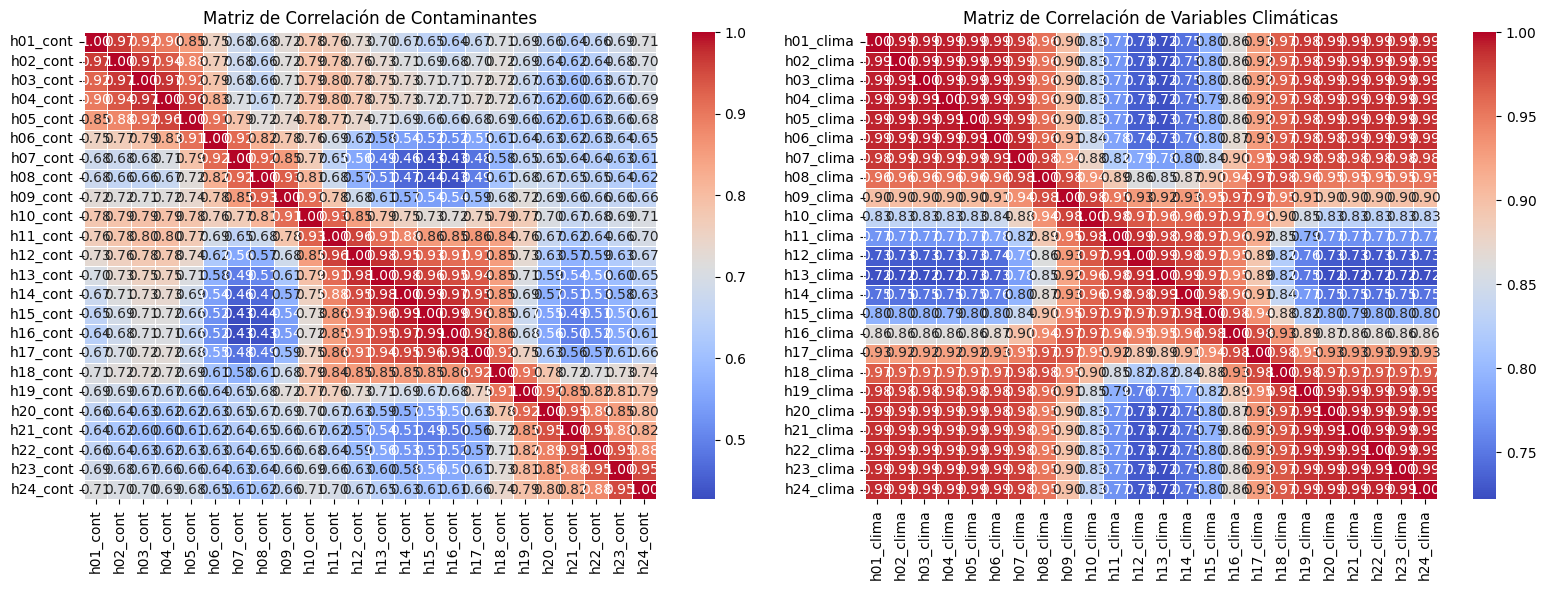

In [30]:

columnas_contaminante = ['h01_cont', 'h02_cont', 'h03_cont', 'h04_cont', 'h05_cont', 'h06_cont', 'h07_cont', 'h08_cont', 'h09_cont', 'h10_cont', 'h11_cont', 'h12_cont', 'h13_cont', 'h14_cont', 'h15_cont', 'h16_cont', 'h17_cont', 'h18_cont', 'h19_cont', 'h20_cont', 'h21_cont', 'h22_cont', 'h23_cont', 'h24_cont']
columnas_clima = ['h01_clima', 'h02_clima', 'h03_clima', 'h04_clima', 'h05_clima', 'h06_clima', 'h07_clima', 'h08_clima', 'h09_clima', 'h10_clima', 'h11_clima', 'h12_clima', 'h13_clima', 'h14_clima', 'h15_clima', 'h16_clima', 'h17_clima', 'h18_clima', 'h19_clima', 'h20_clima', 'h21_clima', 'h22_clima', 'h23_clima', 'h24_clima']


correlation_matrix_contaminante = air_quality_sin_nulos[columnas_contaminante].corr()
correlation_matrix_clima = air_quality_sin_nulos[columnas_clima].corr()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Primer subplot: Matriz de correlación de contaminantes
sns.heatmap(correlation_matrix_contaminante, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title('Matriz de Correlación de Contaminantes')

# Segundo subplot: Matriz de correlación de variables climáticas
sns.heatmap(correlation_matrix_clima, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title('Matriz de Correlación de Variables Climáticas')

# Ajusta el espacio entre los subplots
plt.tight_layout()

# Muestra los subplots
plt.show()
